In [2]:
import numpy as np
from keras.datasets import fashion_mnist
import random
import matplotlib.pyplot as plt


In [2]:
## Functions
def find_winner_node(x,w):
    min_index = np.argmin(np.sum(np.square(w-x),axis=0))
    return min_index

def update_params(x,weights,index, lr, R):
    w = np.copy(weights)
    output_2d_topology = np.reshape(np.array(range(0,225)),(15,15))
    pos_main = np.squeeze(np.argwhere(output_2d_topology == index))
    w[:,index] = w[:,index] + lr * (x - w[:,index]) 
    while R:
      if pos_main[0]-R >= 0:
          index_neighbor_1 = output_2d_topology[(pos_main[0]-R),pos_main[1]]
          w[:,index_neighbor_1] = w[:,index_neighbor_1] + lr * (x - w[:,index_neighbor_1])
      if pos_main[0]+R <= 14:
          index_neighbor_2 = output_2d_topology[(pos_main[0]+R),pos_main[1]]
          w[:,index_neighbor_2] = w[:,index_neighbor_2] + lr * (x - w[:,index_neighbor_2])
      if pos_main[1]-R >= 0:
          index_neighbor_3 = output_2d_topology[pos_main[0],(pos_main[1]-R)]
          w[:,index_neighbor_3] = w[:,index_neighbor_3] + lr * (x - w[:,index_neighbor_3])
      if pos_main[1]+R <= 14:
          index_neighbor_4 = output_2d_topology[pos_main[0],(pos_main[1]+R)]
          w[:,index_neighbor_4] = w[:,index_neighbor_4] + lr * (x - w[:,index_neighbor_4])
      R = R - 1
    return w

def create_image(w):
  temp = []
  temp2 = []
  for i in range(w.shape[1]):
    temp.append(np.reshape(w[:,i],(28,28)))
    if (i+1) % 15 == 0:
      temp_arr = np.array(temp)
      temp_h = np.hstack(temp_arr)
      temp2.append(temp_h)
      temp = []
  temp3 = np.array(temp2)
  img = np.vstack(temp3)
  return img




In [3]:
## Load dataset
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test  = x_test[:3000]
y_test  = y_test[:3000]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
Labels=["T-shirt",
                  "Trouser",
                  "pullover",
                  "Dress",
                  "Coat",
                  "sandal",
                  "Shirt",
                  "Sneaker",
                  "Bag",
                  "boot"]




4431872/4422102 [==============================] - 0s 0us/step


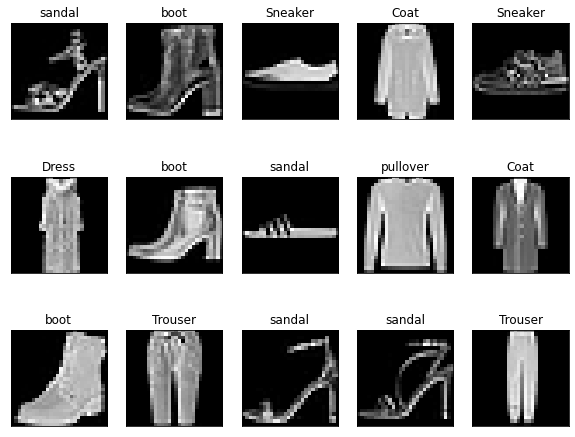

In [5]:
## Show some randome images
figure = plt.figure(figsize=(10, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]),cmap='gray')
    true_index = y_test[index]
    ax.set_title("{}".format(Labels[true_index]))

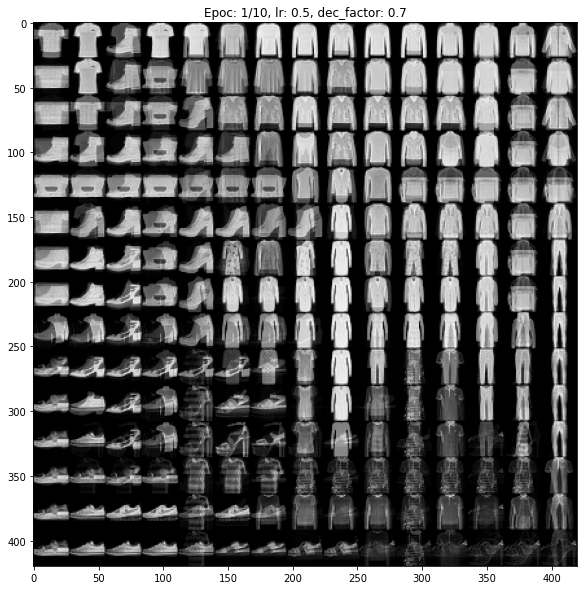

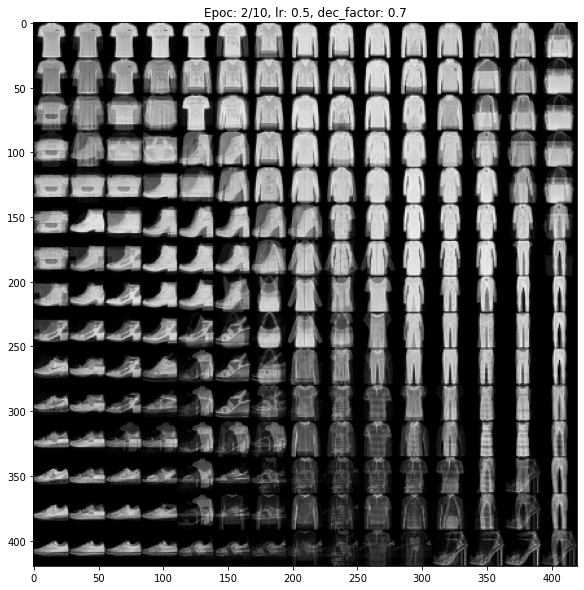

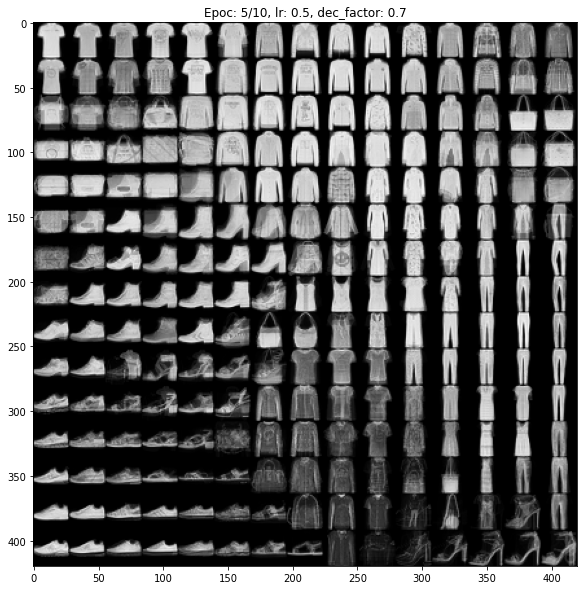

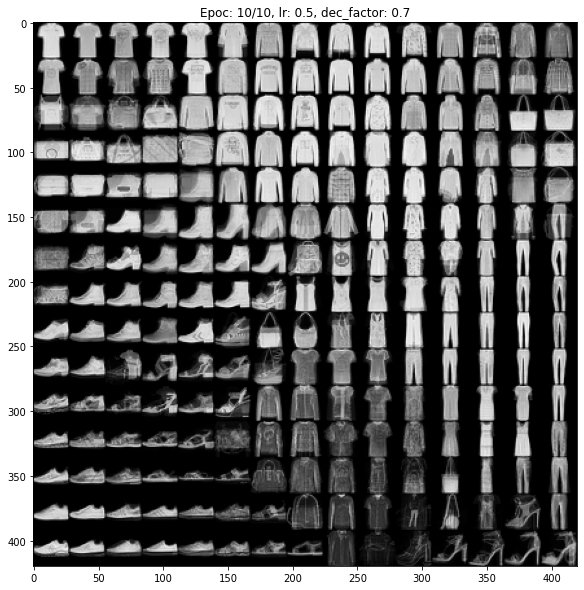

In [5]:
## Train
random.seed(10)
w = np.random.rand(28*28,15*15)
initial_lr = 0.5
decay_factor = 0.7
R = 3
Epoc = 10
lr = initial_lr
img = create_image(w)
for i in range(1,Epoc+1):
    for j in range(x_train.shape[0]):
      x = np.reshape(x_train[j],(28*28,1))
      winner_node = find_winner_node(x,w)
      w = update_params(x.T,w,winner_node,lr,R)
    if i == 1 or i == 2 or i == 5 or i == 10:
      img = create_image(w)
      plt.figure(figsize=(20,10))
      plt.imshow(img,cmap='gray')
      plt.title("Epoc: {}/10, lr: {}, dec_factor: {}".format(i,initial_lr,decay_factor))
      plt.show()
    lr = decay_factor * lr
    if R>0 :
      R = R-1


    

## Test


In [6]:
## Finde Winner nodes
winners_nodes = []
for i in range(x_test.shape[0]):
  x = np.reshape(x_test[i],(28*28,1))
  winner_node = find_winner_node(x,w)
  winners_nodes.append(winner_node)


In [7]:
## Find number of classes/unputs assigned to neurons
Units_classes = {}
Units_numbers = {}
for i in range(len(winners_nodes)):
  cls = []
  count = 1
  cls.append(Labels[y_test[i]])
  for j in range(len(winners_nodes)):
    if i != j:
      if winners_nodes[i] == winners_nodes[j]:
        count = count + 1
        if (Labels[y_test[j]] in cls) == False:
          cls.append(Labels[y_test[j]])
    Units_classes[winners_nodes[i]] = len(cls)
    Units_numbers[winners_nodes[i]] = count



In [8]:
## Evaluation
unique = 0
for i in Units_classes:  
  if Units_classes[i] == 1:
    unique = unique + 1
print("lr: {}, decay_factor: {}".format(initial_lr,decay_factor))
print("No. of winner Neurons:\t{}".format(len(Units_classes)))
print("No.of loser  Neurons:\t{}".format(255-len(Units_classes)))
print("No. of uniqe classes:\t{}".format(unique))

lr: 0.5, decay_factor: 0.7
No. of winner Neurons:	219
No.of loser  Neurons:	36
No. of uniqe classes:	71


<Figure size 432x288 with 0 Axes>

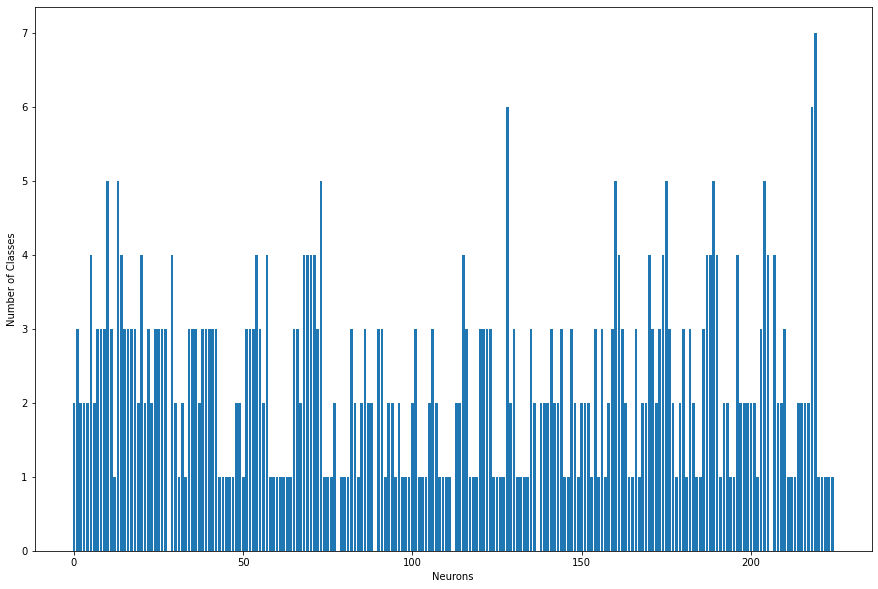

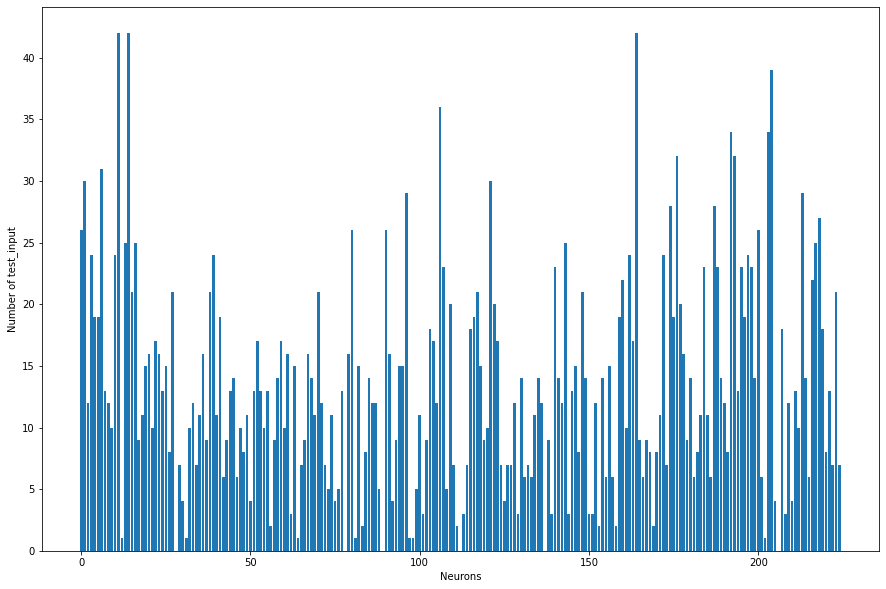

In [9]:
## histohram
Neurons = list(Units_classes.keys())
N_class = list(Units_classes.values())
N_input = list(Units_numbers.values())
plt.figure(1)
plt.figure(figsize=(15,10))
plt.bar(Neurons,N_class)
plt.xlabel("Neurons")
plt.ylabel("Number of Classes")
plt.figure(2)
plt.figure(figsize=(15, 10))
plt.bar(Neurons,N_input)
plt.xlabel("Neurons")
plt.ylabel("Number of test_input")
plt.show() 